# 1. Data Understanding

In [2]:
# importing necessary libraries for data loading and EDA
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the train data
df_train = pd.read_csv(r'/home/ducanh/Credit Card Transactions Fraud Detection/Datasets/fraudTrain.csv')

# check
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# check the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
# check if there are any duplicates in the 'trans_num' column
df_train['trans_num'].duplicated().sum()

np.int64(0)

There are no duplicates in transaction number column

In [6]:
# how many card holders are there
len(df_train['cc_num'].unique())

983

There are 983 cardholders in the train data.

In [7]:
# defining a function that performs the basic data cleaning operations
def data_clean_1(df):
    df = df.iloc[:,1:]
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['dob'] = pd.to_datetime(df['dob'])
    return df
                                                 
# applying the function on our train dataframe
df_train = data_clean_1(df_train)
    
# check
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
# check 2
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [9]:
# let's do the same operation for test data as well
df_test = pd.read_csv(r'/home/ducanh/Credit Card Transactions Fraud Detection/Datasets/fraudTest.csv')

# check
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [10]:
# info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [11]:
# applying the function on our train dataframe
df_test = data_clean_1(df_test)

# check
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [12]:
# let's concat both the train and test dataframes into one dataframe
df = pd.concat([df_train, df_test])

# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time              int64

In [13]:
# cross check
df['trans_num'].duplicated().sum()

np.int64(0)

In [14]:
if len(df) == len(df['trans_num'].unique()):
    print('The data is at transaction level')
else:
    print('The data is not at transaction level')

The data is at transaction level


In [15]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [16]:
# how many card holders are there in the data
len(df['cc_num'].unique())

999

In [17]:
# how many merchants are there
len(df['merchant'].unique())

693

#### Card holders = 999, Merchants = 693

In [18]:
# resetting index
df.reset_index(inplace=True)

In [19]:
# resetting the index
df.drop('index',axis = 1,inplace = True)

# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

#### Average number of transactions per month

In [20]:
# deriving a unique month column w.r.t each year
df['trans_year_month'] = df['trans_date_trans_time'].apply(lambda x: str(x)[:7])

# check
df[['trans_date_trans_time','trans_year_month']]

,trans_date_trans_time,trans_year_month
0,2019-01-01 00:00:18,2019-01
1,2019-01-01 00:00:44,2019-01
2,2019-01-01 00:00:51,2019-01
3,2019-01-01 00:01:16,2019-01
4,2019-01-01 00:03:06,2019-01
...,...,...
1852389,2020-12-31 23:59:07,2020-12
1852390,2020-12-31 23:59:09,2020-12
1852391,2020-12-31 23:59:15,2020-12
1852392,2020-12-31 23:59:24,2020-12


In [21]:
# how many months of data is available
len(df['trans_year_month'].unique())

24

In [22]:
# avg number of transactions per month is computed as
avg_nbr_of_txns = len(df['trans_num'].unique())/len(df['trans_year_month'].unique())
print('Average number of transactions per month = ',round(avg_nbr_of_txns))

Average number of transactions per month =  77183


#### Average number of fradulent transactions per month

In [23]:
# number of fradulent transactions
print('The total number of Fraudulent transactions in the given 2 years period are',len(df[df['is_fraud'] == 1]['trans_num'].unique()))

The total number of Fraudulent transactions in the given 2 years period are 9651


In [24]:
# avg number of fradulent transactions per month
print('Average number of fraudulent transactions per month = ', round(len(df[df['is_fraud'] == 1]['trans_num'].unique())/len(df[df['is_fraud'] == 1]['trans_year_month'].unique())))

Average number of fraudulent transactions per month =  402


In [25]:
# Total value of fraudulent transactions in the given period of 2 years
'$'+str(np.sum(df[df['is_fraud'] == 1]['amt']))

'$5121413.290000001'

In [26]:
len(df[df['is_fraud'] == 1]['trans_num'].unique())

9651

It costed around $ 5 million to the bank.

In [27]:
# Avg amount per fraud transaction is computed as
# total fraudulent transaction amount divided by the total number of fraudulent transactions
print('Average amount per fraud transaction = ${}'.format(round(np.sum(df[df['is_fraud'] == 1]['amt'])/len(df[df['is_fraud'] == 1]['trans_num'].unique()),2)))

Average amount per fraud transaction = $530.66


In [28]:
## cost incurred per month to the bank due to the fraudulent transactions 
round(402*530.66,2)

213325.32

# 2. Exploratory Data Analyses (EDA)

In [29]:
# check info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [30]:
# checking the transaction amount column w.r.t fraudulent transactions
df[df['is_fraud'] == 1]['amt'].describe()

count    9651.000000
mean      530.661412
std       391.028873
min         1.060000
25%       240.075000
50%       390.000000
75%       902.365000
max      1376.040000
Name: amt, dtype: float64

<Figure size 1500x300 with 0 Axes>

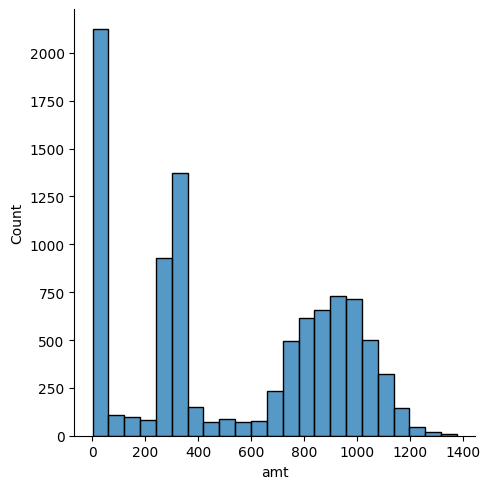

In [31]:
plt.figure(figsize = (15,3))
sns.displot(df[df['is_fraud'] == 1]['amt'])

### Analyses w.r.t. customer demographic information

In [32]:
# deriving age column.
# since this data is till 2020 Dec 31, We will compute age of each customer during 2021.
df['cust_age'] = df['dob'].dt.year.apply(lambda x: 2021-x)

# check
df['cust_age']

0          33
1          43
2          59
3          54
4          35
           ..
1852389    55
1852390    22
1852391    40
1852392    56
1852393    28
Name: cust_age, Length: 1852394, dtype: int64

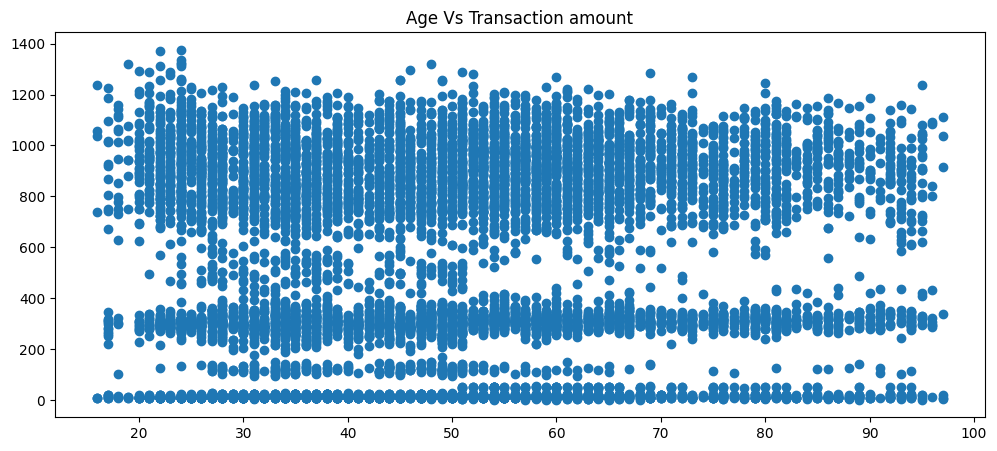

In [33]:
# visualize Age Vs fraudulent transaction amounts
plt.figure(figsize = (12,5))
plt.title('Age Vs Transaction amount')
plt.scatter(df[df['is_fraud'] == 1]['cust_age'],df[df['is_fraud'] == 1]['amt'])
plt.show()

`Inferences:` There's no specific pattern, let's bucket the age column and see the trend towards transaction amount.

In [34]:
# let's bucket the age column
df['cust_age_groups'] = df['cust_age'].apply(lambda x: 'below 10' if x<10 else ('10-20' if x>=10 and x<20 else ('20-30' if x>=20 and x<30 else('30-40' if x>=30 and x<40 else('40-50' if x>=40 and x<50 else('50-60' if x>=50 and x<60 else('60-70' if x>=60 and x<70 else ('70-80' if x>=70 and x<80 else 'Above 80'))))))))

# check
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year_month,cust_age,cust_age_groups
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01,33,30-40
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01,43,40-50
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01,59,50-60
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01,54,50-60
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01,35,30-40


In [35]:
# now let's see which customer age group was more prone towards the number of fraudulent transactions
age_piv = pd.pivot_table(data = df,
                         index = 'cust_age_groups',
                         columns = 'is_fraud',
                         values = 'trans_num',
                         aggfunc = 'count')

# check
age_piv

is_fraud,0,1
cust_age_groups,,
10-20,19662,72
20-30,240278,1299
30-40,431724,1870
40-50,419342,1642
50-60,294902,1832
60-70,211150,1373
70-80,115033,714
Above 80,110652,849


<Axes: title={'center': 'Age group vulnerability'}, xlabel='Age groups', ylabel='No. of transactions'>

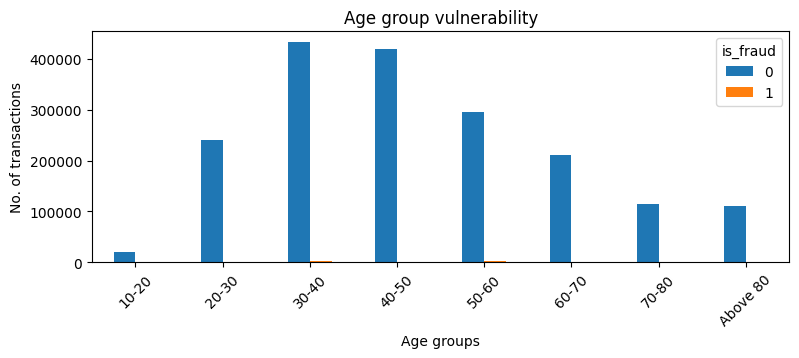

In [36]:
age_piv.plot(kind = 'bar', title = 'Age group vulnerability', xlabel = 'Age groups',ylabel = 'No. of transactions',figsize = (9,3),rot = 45 )

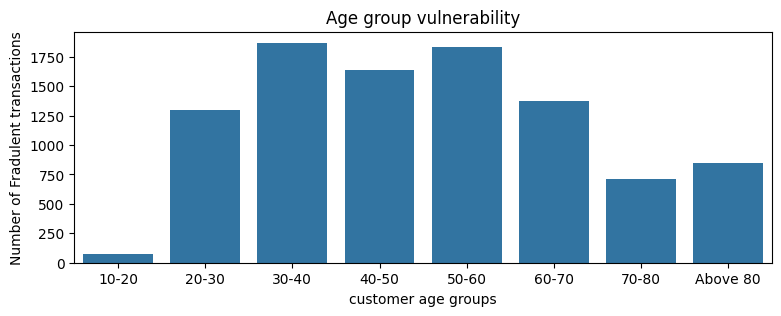

In [37]:
# let's see only fraudlent transactions 
plt.figure(figsize = (9,3))
plt.title('Age group vulnerability')
sns.barplot(data = age_piv, x = age_piv.index, y = age_piv[1].values )
plt.xlabel('customer age groups')
plt.ylabel('Number of Fradulent transactions')
plt.show()

`Inferences:`
Customers who are in the 30-40 age group are more vulnerable to the number of fradulent transactions.

Let's find how much it costed for the bank on an average for each age group in the case of fradulent transactions.

In [38]:
age_piv_2 = pd.pivot_table(data = df,
                           index = 'cust_age_groups',
                           columns = 'is_fraud',
                           values = 'amt',
                           aggfunc = np.mean)

# check
age_piv_2

is_fraud,0,1
cust_age_groups,,
10-20,62.804052,570.907083
20-30,65.090333,547.980169
30-40,71.807532,501.161610
40-50,72.071064,458.982582
50-60,65.087352,551.289754
60-70,62.254365,571.760291
70-80,62.767527,581.812213
Above 80,63.316478,550.361013


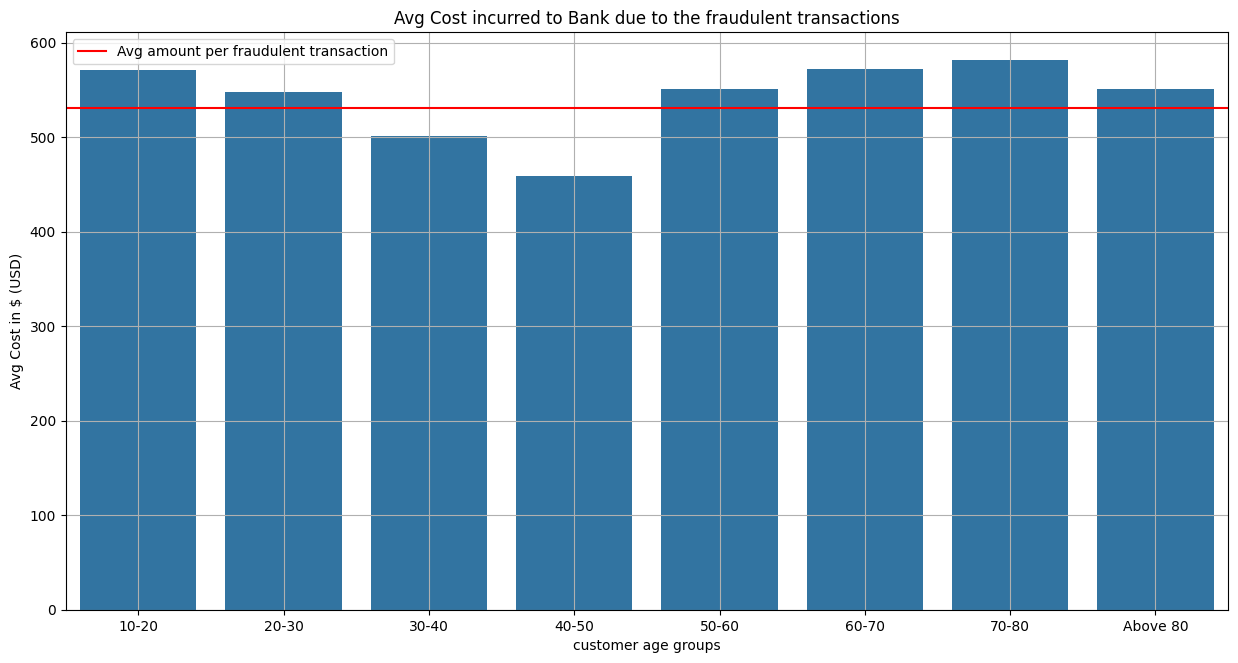

In [39]:
# let's visualize only the fraudlent transactions 
plt.figure(figsize = (15,7.5))
plt.title('Avg Cost incurred to Bank due to the fraudulent transactions')
sns.barplot(data = age_piv_2, x = age_piv_2.index, y = age_piv_2[1].values)
plt.axhline(y = 530.66, color = 'r', linestyle = '-', label = 'Avg amount per fraudulent transaction')
plt.grid()
plt.xlabel('customer age groups')
plt.ylabel('Avg Cost in $ (USD)')
plt.legend()
plt.show()

`Inferences:` 
Avg cost incurred is greater than the overall average transaction amount per fraudulent transaction, for the customers belonging to the age groups `10-30` and `>=50`

In [40]:
# deep dive into gender
age_gen_piv = pd.pivot_table(data = df,
                           index = ['cust_age_groups','gender'],
                           columns = 'is_fraud',
                           values = 'amt',
                           aggfunc = np.mean)

# check
age_gen_piv

is_fraud                        0           1
cust_age_groups gender                       
10-20           F       62.810493  462.360000
                M       62.798893  657.744750
20-30           F       66.296307  507.903902
                M       63.808292  599.881060
30-40           F       71.160408  416.308351
                M       72.772864  584.753779
40-50           F       71.632860  360.021517
                M       72.614785  553.928520
50-60           F       66.886574  522.047746
                M       63.224855  573.657919
60-70           F       61.881839  573.675787
                M       62.653632  569.371408
70-80           F       62.008964  578.499973
                M       63.565175  585.256943
Above 80        F       63.620022  576.027386
                M       62.824387  516.652044

`Inferences:` Banks average compensation is high for the males belonging to age group `10-20` which is $657.74. Except `60-70` and `Above 80` in all the other age groups, males are dominating more in terms of average compensation received compared to their female counterparts.

#### Analysis w.r.t. Customers Job categories 

In [42]:
# see all the customer job categories in the data
df['job'].value_counts()

job
Film/video editor                 13898
Exhibition designer               13167
Surveyor, land/geomatics          12436
Naval architect                   12434
Materials engineer                11711
                                  ...  
Engineer, water                       8
Armed forces technical officer        8
Ship broker                           7
Warehouse manager                     7
Contracting civil engineer            7
Name: count, Length: 497, dtype: int64

Is there any relationship between Customer's professional information and the fraudulent transactions?

In [43]:
job_txn_piv = pd.pivot_table(data = df,
                         index = 'job',
                         columns = 'is_fraud',
                         values = 'trans_num',
                         aggfunc = 'count')


job_txn_piv.sort_values(by = 1, ascending = False, inplace = True)

In [44]:
# check the top 10 job categories of the customers which are more vulnerable towards fradulent transactions
job_txn_piv[:10]

is_fraud,0,1
job,,
Quantity surveyor,8011.0,69.0
Naval architect,12368.0,66.0
Materials engineer,11649.0,62.0
Audiological scientist,8743.0,58.0
Senior tax professional/tax inspector,5820.0,57.0
Trading standards officer,6555.0,56.0
Podiatrist,9471.0,54.0
Film/video editor,13846.0,52.0
Exhibition designer,13116.0,51.0


In [ ]:
# avg cost incurred to bank due to fraudulent transactions w.r.t. each customer job category
job_txn_piv_2 = pd.pivot_table(data = df,
                               index = 'job',
                               columns = 'is_fraud',
                               values= 'amt',
                               aggfunc = np.mean)

# check
job_txn_piv_2

In [ ]:
# visualizing the top 10 job categories from high avg cost
job_txn_piv_2.sort_values(by = 1, ascending = False, inplace = True)

# check
job_txn_piv_2[:10]

In [ ]:
plt.figure(figsize = (12,3))
plt.title('Top 10 Job categories of the customers affected by the fraudulent transactions')
sns.barplot(data = job_txn_piv_2, x = job_txn_piv_2.index.values[:10], y = job_txn_piv_2[1].values[:10])
plt.xlabel('Job categories')
plt.ylabel('Avg fraudulent transaction cost in $')
plt.xticks(rotation = 45)
plt.show()

`Inferences:`Average cost incurred is highest for those customers who are Health promotion specialists. It is $920.25

#### Top states having high average cost incurred to bank

In [ ]:
state_piv = pd.pivot_table(data = df,
                           index = 'state',
                           columns = 'is_fraud',
                           values = 'amt',
                           aggfunc = np.mean)
# check
state_piv

In [ ]:
state_piv.sort_values(by = 1, ascending = False)

`Inferences:` Average cost per month incurred to bank is highest for those customers who belong to `Rhode Island` state, which is $732.98.

#### How city population varies w.r.t. the Fraudulent transaction amount ?

In [ ]:
plt.figure(figsize = (12,3))
plt.title('Fraudulent Transaction amount w.r.t City population')
sns.scatterplot(data = df[df['is_fraud'] == 1], x = df[df['is_fraud'] == 1]['city_pop'], y = df[df['is_fraud'] == 1]['amt'])
plt.xlabel('City population')
plt.ylabel('Transaction amount in $ (USD)')
plt.show()

`Inferences:` There's no specific pattern observed.

In [ ]:
df.info()

#### Top cities which are having high avg cost incurred to bank

In [ ]:
# deriving a column containing city and its respective state
df['city-state'] = df['city']+'-'+df['state']

# check
df['city-state']

In [ ]:
# pivoting
city_piv = pd.pivot_table(data = df,
                          index = 'city-state',
                          columns = 'is_fraud',
                          values = 'amt',
                          aggfunc = np.mean)

# check
city_piv

In [ ]:
# orderding the cost incurred due to fraudulent transactions in descending order
city_piv.sort_values(by = 1, ascending = False, inplace = True)

# check the top 10 cities
city_piv[:10]

`Inferences:` 
- Average cost per month incurred to bank is highest for those customers who belong to `De Lancey` city in `Newyork` state, which is `$926.15`.
- Cities North East and Karns City, both belonging to Pennsylvania state have recorded only the Fraudulent transactions.  

#### Let's plot on the map and see the pattern across various cities.

In [ ]:
# installing plotly
# !pip install plotly

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
    lon = df[df['is_fraud'] == 1]['long'],  
    lat = df[df['is_fraud'] == 1]['lat'],   
    text = df[df['is_fraud'] == 1]['city-state'],     
    marker = dict(
        size = df[df['is_fraud'] == 1]['amt'],  
        sizemode = 'area',
        sizeref = 10,
        sizemin = 8,
        color = df[df['is_fraud'] == 1]['amt'], 
        colorbar = dict(
            title = 'Fraduluent Transaction amount across various cities'
        ),
        colorscale = 'Viridis',
        reversescale = True,
        opacity = 0.7,
        line = dict(
            width = 0.5,
            color = 'rgb(40,40,40)'
        ),
        cmin = 0
    )
))

fig.update_layout(
    title = 'Cities with Fraudulent transaction amount',
    geo = dict(
        scope = 'world',
        showland = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitcolor = 'rgb(255, 255, 255)',
        countrycolor = 'rgb(255, 255, 255)',
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)',
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'equirectangular',
            scale = 5
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [df[df['is_fraud'] == 1]['long'].min() - 5, df[df['is_fraud'] == 1]['long'].max() + 5]  # Adjust the range accordingly
        ),
        lataxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [df[df['is_fraud'] == 1]['lat'].min() - 5, df[df['is_fraud'] == 1]['lat'].max() + 5]  # Adjust the range accordingly
        )
    )
)

fig.show()


`Inferences:` As we see, the concentration of Fraudulent transactions is more in Eastern USA.

#### Top merchant categories which are targeted while performing fraudulent transactions in terms of average transaction amount.

In [ ]:
# df[df['is_fraud'] == 1].groupby('category')['amt'].mean().sort_values(ascending = False)
merch_piv = pd.pivot_table(data = df,
                           index = df['category'],
                           columns = 'is_fraud',
                           values = 'amt',
                           aggfunc = np.mean)

# check
merch_piv

In [ ]:
# Merchant categories which costed greater than or equal to the average fraudulent transaction cost
merch_piv[merch_piv[1]>=530.66]

In [ ]:
plt.figure(figsize = (15,5))
plt.title("Average transaction amount across all merchant categories")
sns.barplot(data = merch_piv,
            x = merch_piv.index,
            y = merch_piv[1])
plt.axhline(y = 530.66, color = 'r', linestyle = '-', label = 'Avg amount per fraudulent transaction')
plt.xticks(rotation = 45)
plt.xlabel('Merchant categories')
plt.ylabel('Average transaction amount in $')
plt.legend()
plt.grid()
plt.show()

`Inferences:` High value fraudulent transactions happened for the merchant category `shopping_net` which means online shopping.

#### How is the geographical distance between customer location to merchant location varies with respect to the fradulent transaction amount

In [ ]:
# function to determine distance between two coordinates
# link to this function: - https://www.geeksforgeeks.org/program-distance-two-points-earth/
from math import radians, cos, sin, asin, sqrt
def distance(df, lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    df['lon1'] = df[lon1].apply(lambda x: radians(x))
    df['lon2'] = df[lon2].apply(lambda x: radians(x))
    df['lat1'] = df[lat1].apply(lambda x: radians(x))
    df['lat2'] = df[lat2].apply(lambda x: radians(x))
      
    # Haversine formula
    df['dlon'] = df['lon2'] - df['lon1']
    df['dlat'] = df['lat2'] - df['lat1']

    df['a'] = df['dlat'].apply(lambda x: sin(x/2)**2) + df['lat1'].apply(lambda x: cos(x))*df['lat2'].apply(lambda x: cos(x))*df['dlon'].apply(lambda x: sin(x/2)**2)
 

    df['c'] = df['a'].apply(lambda x: 2*asin(sqrt(x)))
    
    # Radius of earth in kilometers = 6371. Use 3956 for miles
    r = 3956
      
    # calculate the result
    return(df['c'] * r)

In [ ]:
df['distance_bw_cust_merch_in_miles'] = distance(df,lat1 = 'lat', lat2 = 'merch_lat', lon1 = 'long', lon2 = 'merch_long')

# check
df['distance_bw_cust_merch_in_miles']

In [ ]:
# check 2
df.head()

In [ ]:
# let's bucket the distance between customer and merchant
df['distance_cust_merch'] = df['distance_bw_cust_merch_in_miles'].apply(lambda x: '< 20' if x>0 and x<=20 else('20-40' if x>20 and x<=40 else('40-60' if x>40 and x<=60 else('60-80' if x>60 and x<=80 else '> 80'))))

# check
df[['distance_bw_cust_merch_in_miles','distance_cust_merch']]

In [ ]:
# let's see how w.r.t distance transaction amount varies
dis_piv = pd.pivot_table(data = df,
                         index = 'distance_cust_merch',
                         columns = 'is_fraud',
                         values = 'amt',
                         aggfunc = np.mean)

# check
dis_piv

In [ ]:
# now let's see how fraudulent transaction amount varies w.r.t. the distance between customer and merchant location
plt.figure(figsize = (12,3))
plt.title('Fraudulent Transaction amount w.r.t distance between customer and merchant')
sns.barplot(data = dis_piv, x = dis_piv.index, y = dis_piv[1])
plt.xlabel('Distance between customer and merchant in miles')
plt.ylabel('Fraudulent transaction amount in $ (USD)')
plt.show()

`Inferences:` High average cost incurred to bank is from those customers who are just less than 20 miles away from their merchants. But still we are unable to identify the specific pattern w.r.t distance.

#### How an average transaction amount varies w.r.t each month

In [ ]:
time_series_piv = pd.pivot_table(data = df,
                                 index = 'trans_year_month',
                                 columns = 'is_fraud',
                                 values = 'amt',
                                 aggfunc = np.mean)

# check
time_series_piv

In [ ]:
# let's visualize this
plt.figure(figsize = (12,3))
plt.title('Avg transaction amount varying w.r.t. time')
plt.plot(time_series_piv.index, time_series_piv[0], color = 'green', label = 'Non Fraudulent transaction')
plt.plot(time_series_piv.index, time_series_piv[1], color = 'red', label = 'Fraudulent transaction')
plt.grid()
plt.xlabel('Months')
plt.ylabel('Avg Transaction amount in $')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

`Inferences:` It is irregular and there's no pattern w.r.t. time

In [ ]:
#let's check the frequency of fraudulent transactions w.r.t month and year
time_series_piv2 = pd.pivot_table(data = df[df['is_fraud'] == 1],
                                 index = 'trans_year_month',
                                 columns = 'is_fraud',
                                 values = 'trans_num',
                                 aggfunc = 'count')

# check
time_series_piv2

In [ ]:
# let's visualize this
plt.figure(figsize = (12,3))
plt.title('Frequency of fraudulent transactions w.r.t. time')
plt.plot(time_series_piv2.index, time_series_piv2[1], color = 'red', label = 'Fraudulent transaction')
plt.grid()
plt.xlabel('Months')
plt.ylabel('Frequency of transactions')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [ ]:
# how transaction amount varies w.r.t unix time
plt.figure(figsize = (12,3))
plt.title('Transaction amount w.r.t unix time')
sns.scatterplot(data = df, x = df['unix_time'],y = df['amt'])
plt.show()

`Inferences:` There's no specific pattern w.r.t. the unix time.

In [ ]:
# deriving hours from the transaction date time column
df['trans_hour'] = df['trans_date_trans_time'].dt.time.apply(lambda x: str(x)[:2])

# check
df['trans_hour']

#### Let's figure out usually at what hour of the time, the frequency of fradulent transactions is high

In [ ]:
time_piv = pd.pivot_table(data = df,
                          index = 'trans_hour',
                          columns = ['is_fraud'],
                          values = 'trans_num',
                          aggfunc = 'count')

# check
time_piv

In [ ]:
 # let's visualize
plt.figure(figsize = (15,3))
plt.title('Frequency of fraudulent transactions w.r.t Hour')
sns.barplot(data = time_piv, x = time_piv.index, y = time_piv[1])
plt.xlabel('Hours')
plt.ylabel('Fraudulent transactions')
plt.grid()
plt.show()

`Inferences:` In the two years span, high number of transactions happened during night time, i.e., from 10 PM to 3 AM.

#### Let's figure out at what hour of the time, average cost incurred to bank is high

In [ ]:
time_piv_amt = pd.pivot_table(data = df,
                              index = 'trans_hour',
                              columns = ['is_fraud'],
                              values = 'amt',
                              aggfunc = np.mean)

# check
time_piv_amt

In [ ]:
 # let's visualize
plt.figure(figsize = (15,3))
plt.title('Avg cost incurred due to fraudulent transactions w.r.t. each hour')
sns.barplot(data = time_piv_amt, x = time_piv_amt.index, y = time_piv_amt[1])
plt.axhline(y = 530.66, color = 'r', linestyle = '-', label = 'Avg amount per fraudulent transaction')
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Avg cost incurred in $')
plt.legend()
plt.show()

`Inferences:` Average cost incurred to bank is highest during 2 PM, i.e., $ 709.07. 

It is in the range between $(600-750) from 12 PM to 11 PM.

In [ ]:
merch_txn_hr_piv = pd.pivot_table(data = df,
                                  index = ['trans_hour','category'],
                                  columns = 'is_fraud',
                                  values = 'amt',
                                  aggfunc = np.mean)

# check
merch_txn_hr_piv

Save this file to disk and visualize it in Power BI.

In [ ]:
#merch_txn_hr_piv.to_csv('merchant_txn_hours.csv', index = True)

### For model building, let's remove all the redundant columns from the dataframe

In [ ]:
# all Columns
df.columns

In [ ]:
# columns to be dropped, except trans_num, which we will be dealing further
drop_col = ['trans_date_trans_time', 'cc_num', 'merchant','first', 'last', 'street', 'city', 'state', 'lat',
       'long','dob', 'unix_time', 'merch_lat',
       'merch_long', 'trans_year_month', 'cust_age','city_pop',
       'city-state', 'lon1', 'lon2', 'lat1', 'lat2', 'dlon',
       'dlat', 'a', 'c', 'distance_bw_cust_merch_in_miles',
       'distance_cust_merch']

# dropping above columns from the dataframe
df.drop(drop_col, axis = 1, inplace = True)

# check
df.head()

#### Let's convert the categorical columns (except gender) into numerical columns based on the avg fraudulent txn amount w.r.t. each category

In [ ]:
# let's label encode age column w.r.t the avg fraudulent txn amount
age_piv_2.sort_values(by = 1, ascending = True, inplace = True)

age_piv_2

In [ ]:
# get dictionary
age_dic = {k:v for (k,v) in zip(age_piv_2.index.values, age_piv_2.reset_index().index.values)}

# check
age_dic

In [ ]:
# label encoding the age groups column
df['cust_age_groups'] = df['cust_age_groups'].map(age_dic)

# check
df['cust_age_groups']

In [ ]:
# now let's encode merchant category
merch_cat = df[df['is_fraud'] == 1].groupby('category')['amt'].mean().sort_values(ascending = True)

# check
merch_cat

In [ ]:
merch_cat_dic = {k:v for (k,v) in zip(merch_cat.index.values,merch_cat.reset_index().index.values)}

# check
merch_cat_dic

In [ ]:
# encoding the merchant_category column
df['category'] = df['category'].map(merch_cat_dic)

# check
df['category']

In [ ]:
job_txn_piv_2.sort_values(by = 1, ascending = True, inplace = True)

# check
job_txn_piv_2

In [ ]:
job_txn_piv_2[1].fillna(0, inplace = True)

# check
job_txn_piv_2

In [ ]:
job_txn_piv_2.sort_values(by = 1, ascending = True, inplace = True)

job_txn_piv_2

In [ ]:
# job categories
job_cat_dic = {k:v for (k,v) in zip(job_txn_piv_2.index.values, job_txn_piv_2.reset_index().index.values)}

# check
job_cat_dic

In [ ]:
# label encoding the job column
df['job'] = df['job'].map(job_cat_dic)

# check
df['job']

In [ ]:
# check
df.head()

In [ ]:
# check 2
df.info()

In [ ]:
# let's convert trans_hour into numerical format
df['trans_hour'] = df['trans_hour'].astype('int')

# check
df['trans_hour']

In [ ]:
df.info()

In [ ]:
# create dummies for 'gender' column
df = pd.get_dummies(data  = df, columns = ['gender'], drop_first = True, dtype = 'int')

# check
df.head()

# 3. Train-Test split

In [ ]:
# visualizing class imbalance
df['is_fraud'].value_counts()

In [ ]:
# let's split the dataset into train and test sets. 
# Use stratified approach as to preserve the same class distribution in both train and test sets 
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size=0.33, random_state=42, stratify = df['is_fraud'])

# check
print(train.shape)
print(test.shape)

In [ ]:
# check
train.head()

In [ ]:
# check
test.head()

In [ ]:
# check class proportions in train and test datasets
print(train['is_fraud'].value_counts())
print(test['is_fraud'].value_counts())

In [ ]:
# check for missing values in train data
train.isna().sum()

In [ ]:
# check for missing values in test data
test.isna().sum()

In [ ]:
# storing the transaction numbers from both train and test data into separate dataframes respectively
txn_train = pd.DataFrame(train[['trans_num','amt']].values, columns = ['txn_num','amt'])
txn_test = pd.DataFrame(test[['trans_num','amt']].values, columns = ['txn_num','amt'])

# check
txn_train

In [ ]:
# check 2
txn_test

In [ ]:
# let's drop transaction number columns from both the training and testing data
train.drop('trans_num',axis = 1, inplace = True)
test.drop('trans_num',axis = 1, inplace = True)

In [ ]:
# splitting data into dependent and independent features respectively
y_train = train['is_fraud']
X_train = train.drop('is_fraud',axis = 1)

y_test = test['is_fraud']
X_test = test.drop('is_fraud',axis = 1)

print('Shape of training data: ',(X_train.shape,y_train.shape))
print('Shape of testing data: ',(X_test.shape,y_test.shape))

In [ ]:
# let's delete all the reduntant data frames
del df_train
del df_test
del age_piv
del age_piv_2
del age_gen_piv
del job_txn_piv
del job_txn_piv_2
del state_piv
del city_piv
del time_series_piv

In [ ]:
# let's see how the numerical columns are distributed
sns.displot(X_train['amt'])

In [ ]:
# applying log transformations
X_train['amt'] = np.log(X_train['amt']+1)
X_test['amt'] = np.log(X_test['amt']+1)


In [ ]:
# Visualizing for train data
sns.distplot(X_train['amt'])

In [ ]:
# visualizing for test data
sns.distplot(X_test['amt'])

In [ ]:
# saving the train and test datasets to disk
X_train.to_csv('X_train.csv', index = False)
y_train.to_csv('y_train.csv',index = False)
X_test.to_csv('X_test.csv', index = False)
y_test.to_csv('y_test.csv',index = False)

# 4. Model building and evaluation

## A) Logistic regression

In [ ]:
# let's scale the variables using standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [ ]:
# scaling the training and testing data
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
# convert them into dataframes
X_train_sc = pd.DataFrame(data = X_train_sc, columns = X_train.columns)
X_test_sc = pd.DataFrame(data = X_test_sc, columns = X_test.columns)

In [ ]:
# check 1
X_train_sc.head()

In [ ]:
# check 2
X_test_sc.head()

In [ ]:
# check correlation among all the independent features in train data
plt.figure(figsize = (10,3))
plt.title("Check Correlation among all the independent features")
sns.heatmap(X_train_sc.corr(),annot = True, cmap = 'Greens')
plt.xticks(rotation = 45)
plt.show()


`Inferences:` `job` feature is correlated to `cust_age_groups` and `gender_M` features of about 25% and 24% respectively. Rest all features have very less correlation among themselves.

`Reference:` https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

In [ ]:
# let's build our first logistic regression model with class weight = 'balanced' since we have highly imbalanced data.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, precision_score, recall_score, roc_auc_score, roc_curve

lr = LogisticRegression(class_weight = 'balanced')

In [ ]:
# fitting on the training data
lr.fit(X_train_sc,y_train)

# predictions on the training data
y_pred_train = lr.predict(X_train_sc)

# check
y_pred_train

In [ ]:
# predictions on the test data
y_pred_test = lr.predict(X_test_sc)

# check
y_pred_test

In [ ]:
# let's check the evaluation metrics, import confusion matrix
from sklearn.metrics import confusion_matrix

# for train data
## TN FP
## FN TP
print(confusion_matrix(y_train, y_pred_train))

`Inferences:` We got TP = 5009, FN = 1457 on train data

In [ ]:
# test data
print(confusion_matrix(y_test, y_pred_test))

In [ ]:
# roc_auc score
print(f'ROC_AUC score on train data is {roc_auc_score(y_train,y_pred_train)} and on test data is {roc_auc_score(y_test,y_pred_test)}')

In [ ]:
# accuracy score
print(f'Accuracy on train data is {accuracy_score(y_train,y_pred_train)} and on test data is {accuracy_score(y_test,y_pred_test)}')

In [ ]:
# recall score on train and test data
print(f'Recall score on train data = {recall_score(y_train, y_pred_train)}')

print(f'Recall score on test data = {recall_score(y_test, y_pred_test)}')

Let's try to improve the recall score by trying different thresholds or cut-offs.

In [ ]:
# let's get predicted probabilites for train data
y_pred_train_proba = lr.predict_proba(X_train_sc)

# check
y_pred_train_proba

In [ ]:
# let's get predicted probabilities for test data
y_pred_test_proba = lr.predict_proba(X_test_sc)

# check
y_pred_test_proba

In [ ]:
y_train_results = pd.DataFrame(y_pred_train_proba, columns = ['pred_not_fraud','pred_fraud'])

# check
y_train_results

In [ ]:
y_train_results['y_train_actual'] = y_train.values

# check
y_train_results

In [ ]:
# check the range of probabilities of getting fraud.
y_train_results[y_train_results['y_train_actual'] == 1]['pred_fraud'].plot(kind = 'hist', title = 'Range of probabilities of getting fraud')

In [ ]:
y_test_results = pd.DataFrame(y_pred_test_proba, columns = ['pred_not_fraud','pred_fraud'])

# check
y_test_results

In [ ]:
y_test_results['y_test_actual'] = y_test.values

# check
y_test_results

#### Let's find an optimal threshold point to classify whether it is a fraudulent transaction or not fraudulent transaction.

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_results[i]= y_train_results.pred_fraud.map(lambda x: 1 if x > i else 0)
y_train_results.head()

In [ ]:
# Now let's calculate recall scores for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','recall_score'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in numbers:
    cm1 = confusion_matrix(y_train_results['y_train_actual'], y_train_results[i])
    total1=sum(sum(cm1))
    
    recall_score = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i, recall_score]
print(cutoff_df)

In [ ]:
plt.figure(figsize = (7,3))
plt.title('Finding optimum threshold classification boundary on train data')
plt.plot(cutoff_df.prob, cutoff_df.recall_score)
plt.grid()
plt.show()

#### let's consider 0.15 as an optimal threshold point

In [ ]:
# applying on test data
y_test_results['pred_final'] = y_test_results['pred_fraud'].apply(lambda x: 1 if x>0.15 else 0)

# check
y_test_results.head()

In [ ]:
y_test_results.info()

In [ ]:
# confusion matrix
## TN FP
## FN TP
cm = confusion_matrix(y_test_results['y_test_actual'],y_test_results['pred_final'] )
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
print(cm)

In [ ]:
# computing recall score
print(f'Recall score of the model on test data = {TP/(TP+FN)}')

In [ ]:
np.array(y_test_results['y_test_actual'])

#### We have a matching recall scores between both training and testing data. Based on these predictions, let's do cost benefit analyis.

In [ ]:
arr1 = y_train_results[['y_train_actual',0.15]].values
arr2 = y_test_results[['y_test_actual','pred_final']].values

arr_f = np.concatenate((arr1, arr2), axis=0)

arr_f

In [ ]:
arr_f.shape

In [ ]:
lr_results = pd.DataFrame(arr_f, columns = ['is_f_actual','is_f_pred'])

# check
lr_results

In [ ]:
txn_train

In [ ]:
txn_test

In [ ]:
# Adding transaction num and transaction amt columns
lr_results['txn_amt'] = pd.concat([txn_train,txn_test])['amt'].values
lr_results['txn_num'] = pd.concat([txn_train,txn_test])['txn_num'].values

# check
lr_results

#### Average number of transactions per month detected as fraudulent by the model (TF)

In [ ]:
print('Average number of transactions per month detected as fraudulent by the model = ',len(lr_results[lr_results['is_f_pred'] == 1]['txn_num'].unique())/24)

#### Total cost of providing customer support per month for fraudulent transactions detected by the model (TF * $1.5)

In [ ]:
55921.29*1.5

#### Average number of transactions per month that are fraudulent but not detected by the model (FN)

In [ ]:
print('Average number of transactions per month that are fraudulent but not detected by the model = ',len(lr_results[(lr_results['is_f_actual'] == 1) & (lr_results['is_f_pred'] == 0)]['txn_num'].unique())/24)

#### Cost incurred due to fraudulent transactions left undetected by the model (FN*c)

In [ ]:
print('Cost incurred due to fraudulent transactions left undetected by the model = $',26.54*530.6614)

#### Cost incurred per month after the model is built and deployed (TP)

In [ ]:
print(f'Cost incurred per month after the model is built and deployed = ${round(83881.935+14083.753,2)}')

#### Final Savings = Cost incurred before model deployment - Cost incurred after model deployment

In [ ]:
print('Final savings = $',213392.22-97965.69)

In [ ]:
# saving the model results into a dataframe
model_results = pd.DataFrame(columns = ['model','train_recall_score','test_recall_score','Cost saved by the model per month'])

model_results.loc[len(model_results)] = ['Logistic Regression model', 0.93, 0.93, '$115,538.03']

# check
model_results

In [ ]:
# save this data frame to disk as .csv file
model_results.to_csv('model_results.csv', index = False)

In [ ]:
# saving the logistic regression model as well.
import joblib
joblib.dump(value = lr, filename = r'models\logistic_reg_model_2.pkl' )

In [ ]:
# check whether the model is saved properly
lr = joblib.load(r'models\logistic_reg_model_2.pkl')

In [ ]:
lr.feature_names_in_

In [ ]:
lr.class_weight

In [ ]:
lr.get_params()

### Our Logistic regression model is successful in saving the costs per month upto $115,426.53

## B) Random Forest Classifier

In [ ]:
# instantiating random forest classifier with class weights
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rf = RandomForestClassifier(class_weight = 'balanced')

In [ ]:
# fitting on the training data
rf.fit(X_train,y_train)

# predictions on the training data
y_pred_train_rf = rf.predict(X_train)

# predictions on the test data
y_pred_test_rf = rf.predict(X_test)

In [ ]:
# check predictions on train data
y_pred_train_rf

In [ ]:
# check predictions on test data
y_pred_test_rf

In [ ]:
# check confusion matrix on both train and test data

## TN FP
## FN TP
cm_train = confusion_matrix(y_train,y_pred_train_rf)
cm_test = confusion_matrix(y_test,y_pred_test_rf)
print('Training data:',cm_train)
print()
print('Testing data:', cm_test)

In [ ]:
# check recall scores on train data
print(f'Recall score of the model on train data: {cm_train[1][1]/(cm_train[1][1]+cm_train[1][0])}')

In [ ]:
# check recall scores on test data
print(f'Recall score of the model on test data: {cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])}')

In [ ]:
# get the parameters of the model
rf.get_params()

`Inferences:` Model overfit

In [ ]:
# importing randomized search cv to do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(class_weight = 'balanced')
params = {'n_estimators':[5,10,20,40,80,100,200],
          'criterion':['gini','entropy','log_loss'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10],
          'oob_score': [True]}


#randomized search cv
rcv = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 10, scoring = 'recall', cv = 10, verbose=5, 
                                random_state=42, n_jobs=-1, return_train_score=True)
rcv.fit(X_train,y_train)

In [ ]:
# best estimator
rcv.best_estimator_

In [ ]:
# best score
rcv.best_score_

In [ ]:
# let's re build random forest model
rf = rcv.best_estimator_

# fitting on train data
rf.fit(X_train,y_train)

In [ ]:
# predictions on train data
y_train_pred_rf = rf.predict(X_train)

# predictions on test data
y_test_pred_rf = rf.predict(X_test)

In [ ]:
# check confusion matrix on both train and test data
## TN FP
## FN TP
cm_train = confusion_matrix(y_train,y_train_pred_rf)
cm_test = confusion_matrix(y_test,y_test_pred_rf)
print('Training data:',cm_train)
print()
print('Testing data:', cm_test)

In [ ]:
# check recall scores on train data
print(f'Recall score of the model on train data: {cm_train[1][1]/(cm_train[1][1]+cm_train[1][0])}')
# check recall scores on test data
print(f'Recall score of the model on test data: {cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])}')

In [ ]:
# feature importances
feature_imp_rf = pd.DataFrame(index = X_train.columns, data = rf.feature_importances_*100, columns = ['feature_importance_%'])

# check
feature_imp_rf

In [ ]:
plt.title('Feature importances by Random Forest Classifier')
plt.pie(x = feature_imp_rf['feature_importance_%'], labels = feature_imp_rf.index, rotatelabels = True)
plt.show()

`Inferences:` As per the random forest model, the top 3 significant features are `Transaction_amount`, `Transaction_hour` and `Merchant category`. 

In [ ]:
# let's drop the remaining features which are redundant and re train the model
X_train_final = X_train[['amt','trans_hour','category']]
X_test_final = X_test[['amt','trans_hour','category']]


In [ ]:
# initializing random forest model
rf = rcv.best_estimator_

# fitting
rf.fit(X_train_final,y_train)

In [ ]:
# predictions on train data
y_train_pred_rf = rf.predict(X_train_final)

# predictions on test data
y_test_pred_rf = rf.predict(X_test_final)

In [ ]:
# check confusion matrix on both train and test data
## TN FP
## FN TP
cm_train = confusion_matrix(y_train,y_train_pred_rf)
cm_test = confusion_matrix(y_test,y_test_pred_rf)
print('Training data:',cm_train)
print()
print('Testing data:', cm_test)

In [ ]:
# check recall scores on train data
print(f'Recall score of the model on train data: {cm_train[1][1]/(cm_train[1][1]+cm_train[1][0])}')
# check recall scores on test data
print(f'Recall score of the model on test data: {cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])}')

In [ ]:
# feature importances
feature_imp_rf = pd.DataFrame(index = X_train_final.columns, data = rf.feature_importances_*100, columns = ['feature_importance_%'])

# check
feature_imp_rf

In [ ]:
plt.title('Feature importances by Random Forest Classifier')
plt.pie(x = feature_imp_rf['feature_importance_%'], labels = feature_imp_rf.index, rotatelabels = True)
plt.show()

#### Let's perform cost benefit analysis using the Random forest classifier model.

In [ ]:
# creating a dataframe
rf_results = pd.DataFrame()

In [ ]:
rf_results['txn_num'] = pd.concat([txn_train,txn_test])['txn_num'].values
rf_results['amt'] = pd.concat([txn_train,txn_test])['amt'].values
rf_results['fraud_act'] = np.concatenate([y_train,y_test],axis = 0)
rf_results['fraud_pred'] = np.concatenate([y_train_pred_rf,y_test_pred_rf],axis = 0)

# check
rf_results

#### Average number of transactions per month detected as fraudulent by the model (TF)

In [ ]:
f_txns = round(len(rf_results[rf_results['fraud_pred'] == 1]['txn_num'].unique())/24)

print(f_txns)

In [ ]:
print(f'Total cost of providing customer support per month for fraudulent transactions detected by the model = {f_txns*1.5}')

#### Average number of transactions per month that are fraudulent but not detected by the model

In [ ]:
f_txns_tn = round(len(rf_results[(rf_results['fraud_act'] == 1) & (rf_results['fraud_pred'] == 0)]['txn_num'].unique())/24)

print(f_txns_tn)

In [ ]:
print(f'Cost incurred due to fraudulent transactions left undetected by the model = {f_txns_tn*530.66}')

In [ ]:
print(f'Cost incurred per month after the model is built and deployed = {2115+7429.24}')

#### Final savings = Cost incurred before - Cost incurred after

In [ ]:
print(f'Final savings = $ {213325.32 - 9544.24}')

In [ ]:
model_results

In [ ]:
# saving the results
model_results.loc[len(model_results)] = ['Random Forest Clasifier model', 0.97,0.95,'$203,781.08']

# check
model_results

### Our Random forest classifier model saved almost 96% of the cost per month to the bank, it performed far better than the Logistic regression model.

In [ ]:
# save these results to disk
model_results.to_csv('model_results.csv', index = False)

In [ ]:
# saving the Randomforest model as well
joblib.dump(rf, filename = r'models\randomforest_model_f.pkl')

In [ ]:
X_train_final.columns